In [ ]:
!pip install matplotlib seaborn 
# pandas numpy scipy

Import Librerie

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

Caricamento Dataset con pandas

In [2]:
data = pd.read_csv("./data_csv/atp_matches_qual_chall_2022.csv", sep=",")
data_2 = pd.read_csv("./data_csv/atp_matches_qual_chall_2023.csv", sep=",")
data_3 = pd.read_csv("./data_csv/atp_matches_qual_chall_2024.csv", sep=",")

In [3]:
# Concatenate DataFrames vertically
df = pd.concat([data, data_2, data_3], axis=0, ignore_index=True)

In [4]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2022-0059,Salinas CH,Hard,32,C,20220404,238,111569,6.0,NaN,...,33.0,15.0,11.0,8.0,8.0,14.0,537.0,57.0,NaN,NaN
1,2022-0059,Salinas CH,Hard,32,C,20220404,239,104907,NaN,NaN,...,76.0,48.0,17.0,16.0,4.0,9.0,725.0,28.0,629.0,40.0
2,2022-0059,Salinas CH,Hard,32,C,20220404,240,111788,5.0,NaN,...,49.0,29.0,12.0,10.0,6.0,9.0,516.0,61.0,NaN,NaN
3,2022-0059,Salinas CH,Hard,32,C,20220404,241,138485,10.0,NaN,...,29.0,11.0,6.0,7.0,2.0,7.0,613.0,43.0,1306.0,4.0
4,2022-0059,Salinas CH,Hard,32,C,20220404,242,200587,4.0,NaN,...,19.0,4.0,6.0,7.0,3.0,9.0,496.0,66.0,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30643 entries, 0 to 31868
Data columns (total 73 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tourney_id             30643 non-null  object        
 1   tourney_name           30643 non-null  object        
 2   surface                30643 non-null  object        
 3   draw_size              30643 non-null  int64         
 4   tourney_level          30643 non-null  object        
 5   tourney_date           30643 non-null  datetime64[ns]
 6   match_num              30643 non-null  int64         
 7   winner_id              30643 non-null  int64         
 8   winner_seed            15392 non-null  float64       
 9   winner_entry           5874 non-null   object        
 10  winner_name            30643 non-null  object        
 11  winner_hand            30643 non-null  object        
 12  winner_ht              30109 non-null  float64       
 13  winner

1.data → Il DataFrame di partenza.

2.['winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'] → Elenco delle colonne da rimuovere.

3.axis=1 → Specifica che si vogliono rimuovere le colonne (non righe).

4.inplace=True → Apporta le modifiche direttamente al DataFrame senza dover riassegnarlo.

In [ ]:
#df.drop(['match_num','winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'], axis=1, inplace=True) # da inserire in una tabella a parte insieme a winner_id e loser_id

#ranking_player = df[['winner_id','loser_id','winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']].copy()

# con ranking possiamo capire se il giocatore dato per favorito perde (con ranking loser > ranking winner), 
# frequenza, in quale stagione ecc..


Considerazione: score è una colonna che, se il mio obiettivo è trovare il giocatore che ha maggior probabilità di vincere è fondamentale perchè posso capire diversi fattori e trasformali in medie:
1. Calcolare con tutto il data, quante volte si è ritirato considerando il numero di partite totali e le partite W/O diamo un peso, mentre RET un'altro media ponderata.
    - in che stagione si è ritirato di più
    - su che tipo di campo
    - frequenza di ritiro 1 volta ogni 7 partite, ecc..
    - quando si è ritirato di più best of di 3 o 5
    - a che round 
    - dopo quanti minuti
    - Dopo però nelle successive analisi posso eliminarla W/O e RET
2. 7-6(5) 7-6(1) quante volte il giocatore va al tiè break e quante volte vince/perde
    - devo separare ogni valore presente nelle righe e separarlo in colonne 'score_1set_w', 'score_2set_l'
    - quindi nel primo set tende a superare 5 se vince, viceversa se perde non  fa <=3
    - se torneo meglio 3 o meglio 5 quanti punti fa, fa spesso 2 a 0
3. Formattare data
    - Trovare stagioni
4. Prendere 2 giocatori che hanno giocato più partite e fare breve analisi sulle prestazioni (magari anche testa a testa)
    - Prendere ogni torneo e fare analisi sulle prestazioni generali

L'obiettivo è creare delle classi o funzioni che fanno questi punti. Di modo che alla fine si fa un main.py e faremo girare l'app demo in streamlit, dove possiamo inserire un id o nome (giocatore o torneo) e lui ci farà tutte le analisi del caso. Difficile ma carino.

Vedere se i tornei sono tutti a eliminazione diretta!


1. Cancellare RET e W/O
2. dividere score
3. formattare data, stagione 





In [ ]:
#for score in data['score'].unique():
#    print(score)

#num_wo = np.sum(data['score'].values == 'W/O')
#num_wo

#num_ret = np.sum(np.char.find(data['score'].values.astype(str), 'RET') >= 0)
#num_ret

#num_true = np.sum(data['ritiro'].values)
#num_true

In [ ]:
df['ritiro'] = np.logical_or(
    np.char.find(df['score'].values.astype(str), 'RET') >= 0,
    np.char.find(df['score'].values.astype(str), 'W/O') >= 0
)

In [ ]:
#calcolo_ritiro = df[['winner_id','winner_name','loser_id', 'loser_name', 'score', 'ritiro', 'best_of', 'round', 'minutes']].copy()

In [ ]:
#calcolo_ritiro.head()

In [ ]:
#calcolo_ritiro.info()

In [6]:
#ritiro_rows = df[np.char.find(df['score'].values.astype(str), 'RET') >= 0]
#ritiro_rows

#ritiro_rows = df[np.char.find(df['score'].values.astype(str), 'W/O') >= 0]
#ritiro_rows

#ritiro_rows = df[np.char.find(df['score'].values.astype(str), 'DEF') >= 0]
#ritiro_rows['score']

#ritiro_rows = df[np.char.find(df['score'].values.astype(str), 'DEF') >= 0]
#ritiro_rows


#num_wo = np.sum(calcolo_ritiro['score'].values == 'W/O')
#num_wo

#for score in df['score'].unique():
#    print(score)

### Alla fine salvare in una tabella calcolo_ritiro

In [4]:
eliminare = reduce(np.logical_or, [
    np.char.find(df['score'].values.astype(str), 'RET') >= 0,
    np.char.find(df['score'].values.astype(str), 'W/O') >= 0,
    np.char.find(df['score'].values.astype(str), 'DEF') >= 0,
    np.char.find(df['score'].values.astype(str), 'Ret') >= 0,
    np.char.find(df['score'].values.astype(str), 'Def.') >= 0
])

df = df[~eliminare]

In [ ]:
# Cancellare False da calcolo ritiro
#calcolo_ritiro = calcolo_ritiro[calcolo_ritiro['ritiro'].values]

In [8]:
# Funzione per separare i set e gestire i tie-break
def extract_scores(score):
    try:
        sets = score.split()
        scores = []
        
        for s in sets:
            if '(' in s:  # Caso Tie-Break
                try:
                    w, tiebreak = s.split('(')
                    w, l = w.split('-')
                    scores.extend([int(w), int(l), int(tiebreak.strip(')'))])
                except ValueError:
                    scores.extend([np.nan, np.nan, np.nan])
            elif '-' in s:
                try:
                    w, l = s.split('-')
                    scores.extend([int(w), int(l), np.nan])  # No tie-break
                except ValueError:
                    scores.extend([np.nan, np.nan, np.nan])    
            else:
                scores.extend([np.nan, np.nan, np.nan])
            
        # Completamento con NaN se mancano dati
        while len(scores) < 15:
            scores.append(np.nan)
        
        return scores[:15]

    except Exception as e:
        print(f"Errore con il valore '{score}': {e}")
        return [np.nan] * 15  # Riempie i valori con NaN in caso di errore



In [9]:
# Applicazione della funzione e creazione delle colonne
score_cols = ['score_1set_w', 'score_1set_l', 'score_tiebreak_1set_l', 
              'score_2set_w', 'score_2set_l', 'score_tiebreak_2set_l',
              'score_3set_w', 'score_3set_l', 'score_tiebreak_3set_l',
              'score_4set_w', 'score_4set_l', 'score_tiebreak_4set_l',
              'score_5set_w', 'score_5set_l', 'score_tiebreak_5set_l']

df[score_cols] = np.array([extract_scores(s) for s in df['score']])


In [10]:
import numpy as np

# Funzione per calcolare i set vinti con NumPy
def calculate_winner_loser_score(df):
    # Verifica che le colonne necessarie siano presenti nel DataFrame
    required_columns = [
        'score_1set_w', 'score_2set_w', 'score_3set_w', 'score_4set_w', 'score_5set_w',
        'score_1set_l', 'score_2set_l', 'score_3set_l', 'score_4set_l', 'score_5set_l'
    ]
    
    # Controllo se le colonne richieste esistono nel DataFrame
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Mancano le seguenti colonne richieste: {missing_columns}")
    
    # Creazione della colonna 'winner_score'
    set_wins = np.sum(
        (df[['score_1set_w', 'score_2set_w', 'score_3set_w', 'score_4set_w', 'score_5set_w']].values >
         df[['score_1set_l', 'score_2set_l', 'score_3set_l', 'score_4set_l', 'score_5set_l']].values), 
        axis=1
    )

    set_loser = np.sum(
        (df[['score_1set_w', 'score_2set_w', 'score_3set_w', 'score_4set_w', 'score_5set_w']].values <
         df[['score_1set_l', 'score_2set_l', 'score_3set_l', 'score_4set_l', 'score_5set_l']].values), 
        axis=1
    )
    
    # Aggiungi la colonna 'winner_score' al DataFrame
    df['winner_score'] = set_wins
    df['loser_score'] = set_loser

    return df


In [11]:
df = calculate_winner_loser_score(df)

#print(df['winner_score', 'loser_score'])

In [5]:
df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')


In [22]:
df['tourney_date']

0       2022-04-04
1       2022-04-04
2       2022-04-04
3       2022-04-04
4       2022-04-04
           ...    
31864   2024-11-25
31865   2024-11-25
31866   2024-11-25
31867   2024-11-25
31868   2024-11-25
Name: tourney_date, Length: 30643, dtype: datetime64[ns]

In [19]:
score_df = df[['score_1set_w', 'score_1set_l', 'score_tiebreak_1set_l', 'score_2set_w', 'score_2set_l', 'score_tiebreak_2set_l', 'score_3set_w',           
              'score_3set_l', 'score_tiebreak_3set_l', 'score_4set_w', 'score_4set_l', 'score_tiebreak_4set_l', 'score_5set_w',          
              'score_5set_l', 'score_tiebreak_5set_l', 'winner_score', 'loser_score'
              ]].copy()


In [20]:
score_df

,score_1set_w,score_1set_l,score_tiebreak_1set_l,score_2set_w,score_2set_l,score_tiebreak_2set_l,score_3set_w,score_3set_l,score_tiebreak_3set_l,score_4set_w,score_4set_l,score_tiebreak_4set_l,score_5set_w,score_5set_l,score_tiebreak_5set_l,winner_score,loser_score
0,6.0,2.0,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
1,5.0,7.0,NaN,7.0,5.0,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
2,6.0,4.0,NaN,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
3,6.0,1.0,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
4,6.0,0.0,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31864,7.0,5.0,NaN,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
31865,6.0,4.0,NaN,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
31866,6.0,4.0,NaN,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
31867,7.0,6.0,6.0,3.0,6.0,NaN,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1


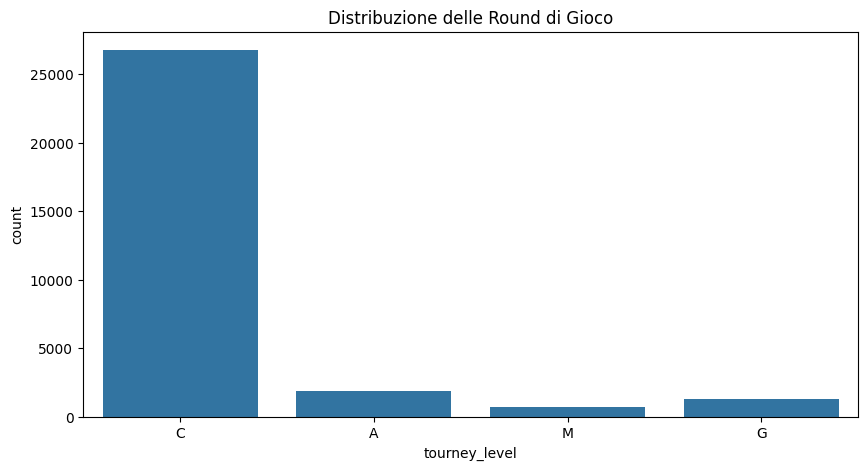

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(x='tourney_level', data=df)
plt.title('Distribuzione delle Round di Gioco')
plt.show()

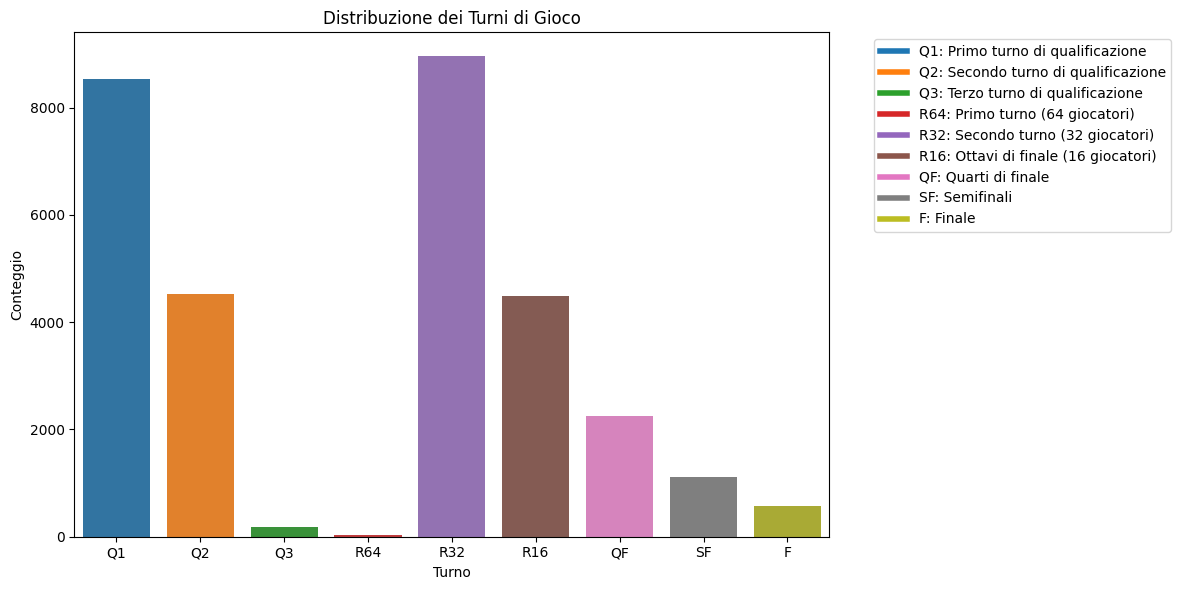

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dizionario per mappare le abbreviazioni ai loro significati (IN ORDINE LOGICO)
round_labels = {
    'Q1': 'Primo turno di qualificazione',
    'Q2': 'Secondo turno di qualificazione',
    'Q3': 'Terzo turno di qualificazione',
    'R64': 'Primo turno (64 giocatori)',
    'R32': 'Secondo turno (32 giocatori)',
    'R16': 'Ottavi di finale (16 giocatori)',
    'QF': 'Quarti di finale',
    'SF': 'Semifinali',
    'F': 'Finale'
}

# Ordinamento personalizzato per il grafico
round_order = list(round_labels.keys())

# Mappa di colori personalizzati
round_colors = {
    'Q1': '#1f77b4',   # Blu
    'Q2': '#ff7f0e',   # Arancione
    'Q3': '#2ca02c',   # Verde
    'R64': '#d62728',  # Rosso
    'R32': '#9467bd',  # Viola
    'R16': '#8c564b',  # Marrone
    'QF': '#e377c2',   # Rosa
    'SF': '#7f7f7f',   # Grigio
    'F': '#bcbd22'     # Giallo
}

# Creazione del grafico con colori personalizzati
plt.figure(figsize=(12, 6))
sns.countplot(x='round', hue= 'round', data=df, order=round_order, palette=round_colors, legend=False)

# Titoli e asse
plt.title('Distribuzione dei Turni di Gioco')
plt.xlabel('Turno')
plt.ylabel('Conteggio')

# Aggiunta della legenda
handles = [plt.Line2D([0], [0], color=round_colors[abbr], lw=4, label=f'{abbr}: {desc}') 
           for abbr, desc in round_labels.items()]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


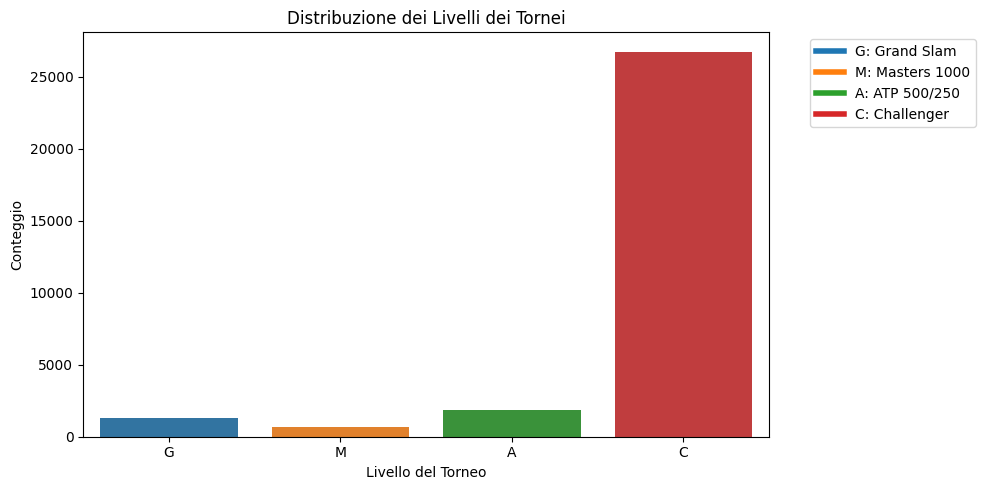

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definizioni dei livelli dei tornei
tourney_labels = {
    'G': 'Grand Slam',
    'M': 'Masters 1000',
    'A': 'ATP 500/250',
    'C': 'Challenger'
}

tourney_order = list(tourney_labels.keys())
tourney_colors = {
    'G': '#1f77b4',
    'M': '#ff7f0e',
    'A': '#2ca02c',
    'C': '#d62728'
}

# Grafico senza warning
plt.figure(figsize=(10, 5))
sns.countplot(x='tourney_level', hue='tourney_level', data=df,
              order=tourney_order, palette=tourney_colors, legend=False)

plt.title('Distribuzione dei Livelli dei Tornei')
plt.xlabel('Livello del Torneo')
plt.ylabel('Conteggio')

# Legenda manuale
handles = [plt.Line2D([0], [0], color=tourney_colors[abbr], lw=4, label=f'{abbr}: {desc}') 
           for abbr, desc in tourney_labels.items()]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [13]:
# Selezione delle colonne indicate
selected_cols = [
    'winner_ht', 'winner_age', 'loser_ht', 'loser_age', 'best_of', 'minutes',
    'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
    'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
    'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
    'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
    'winner_score', 'loser_score'
]

# Copia del dataset con solo le colonne selezionate
df_corr = df[selected_cols].copy()


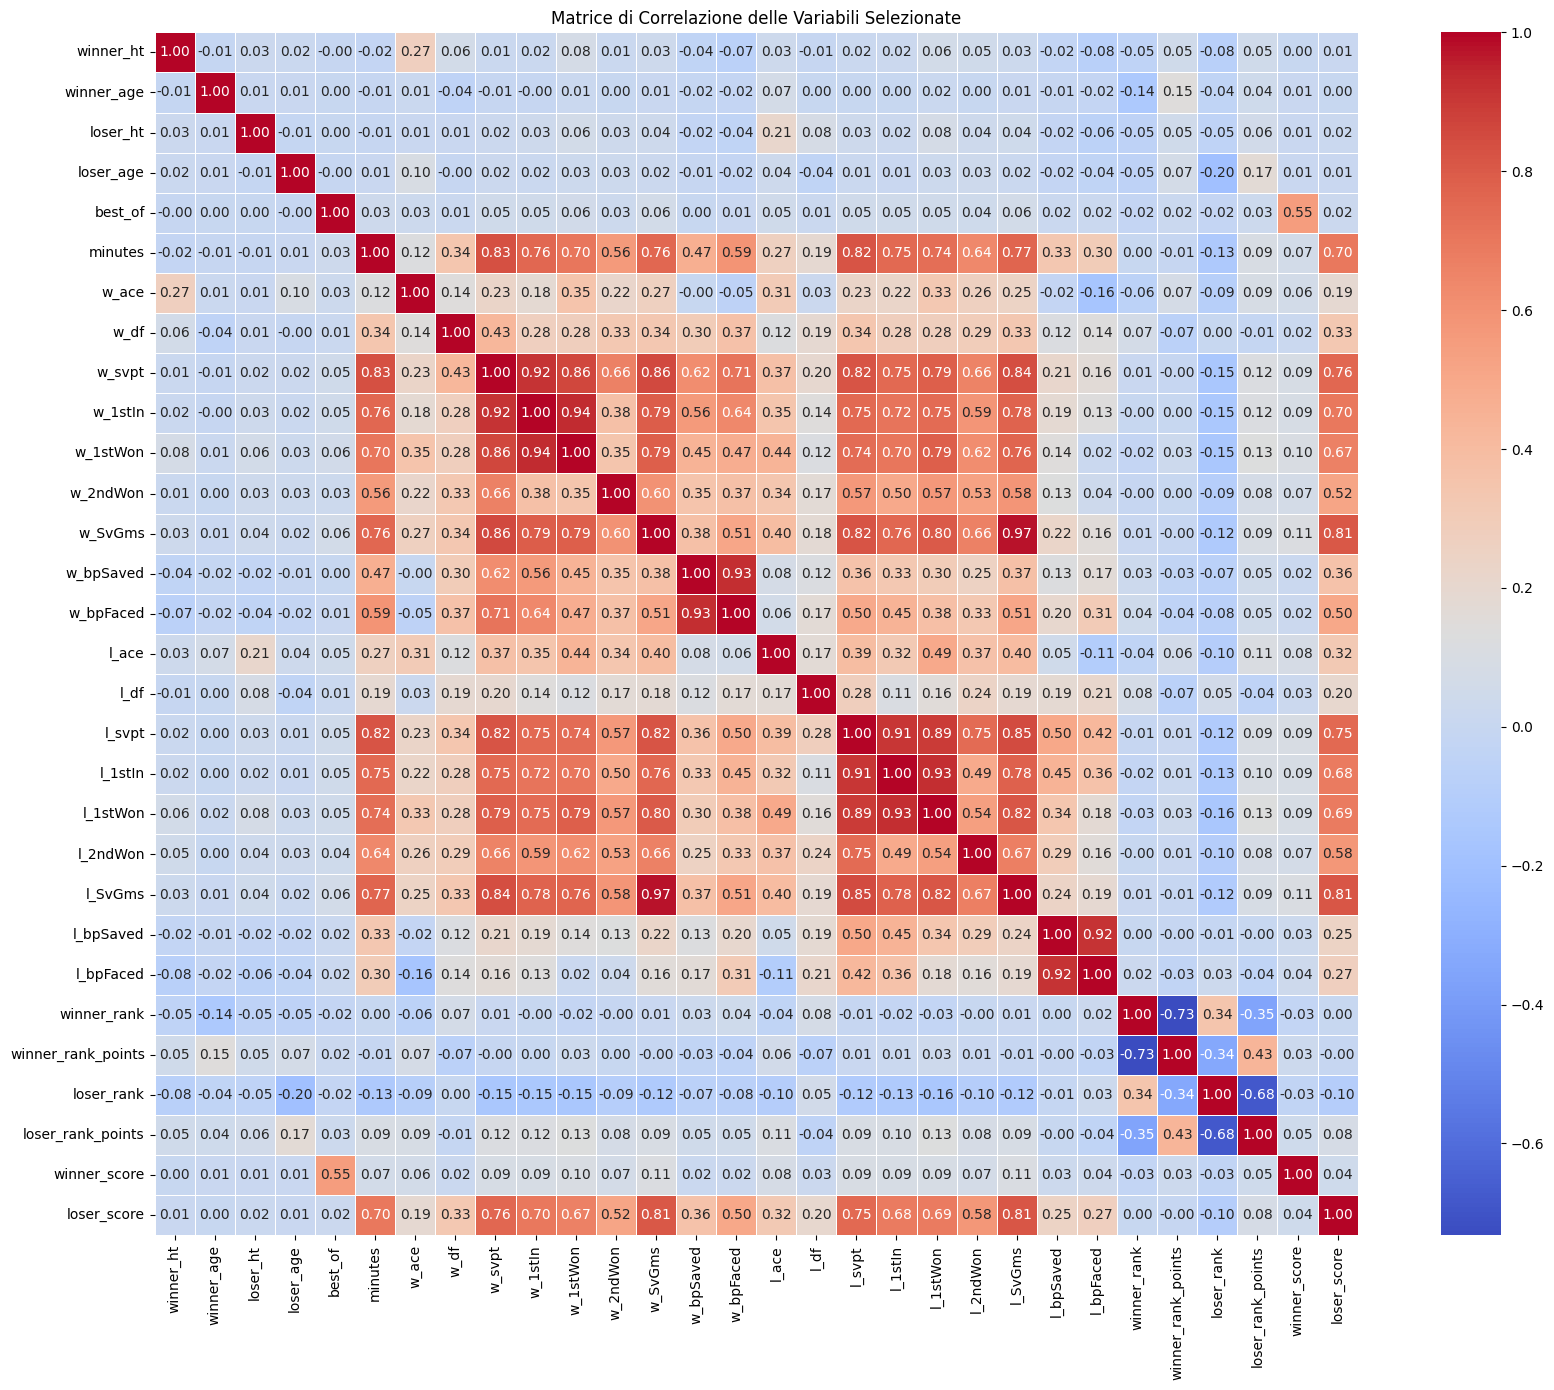

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolo della matrice di correlazione (ignora automaticamente i NaN)
corr_matrix = df_corr.corr()

# Visualizzazione con heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Matrice di Correlazione delle Variabili Selezionate')
plt.tight_layout()
plt.show()


In [61]:
def calculate_dominance_ratio(df):
    import numpy as np

    # --- Vincitore ---
    df['w_sv_won'] = df['w_1stWon'] + df['w_2ndWon']
    df['w_sv_lost'] = df['w_svpt'] - df['w_sv_won']

    df['l_sv_won'] = df['l_1stWon'] + df['l_2ndWon']
    df['l_sv_lost'] = df['l_svpt'] - df['l_sv_won']

    df['w_return_pct'] = df['l_sv_lost'] / df['l_svpt']
    df['w_serve_lost_pct'] = df['w_sv_lost'] / df['w_svpt']
    df['w_dominance_ratio'] = df['w_return_pct'] / df['w_serve_lost_pct']
        

    # Gestione divisioni per zero e valori estremi
    df = df.replace({ 'w_dominance_ratio': {np.inf: np.nan, -np.inf: np.nan} })

    return df


In [62]:
df = calculate_dominance_ratio(df)

In [63]:
dr = df[['w_dominance_ratio', 'winner_id', 'tourney_date', 'score', 'w_sv_won', 'w_sv_lost', 'l_sv_won', 'l_sv_lost', 'w_return_pct', 'w_serve_lost_pct']].copy()

dr_sorted = dr.sort_values(by='w_dominance_ratio', ascending=False)

dr_sorted

,w_dominance_ratio,winner_id,tourney_date,score,w_sv_won,w_sv_lost,l_sv_won,l_sv_lost,w_return_pct,w_serve_lost_pct
21941,15.880952,111794,2024-10-14,6-1 6-1,28.0,1.0,19.0,23.0,0.547619,0.034483
15576,15.352941,209070,2023-07-24,6-0 6-3,28.0,1.0,24.0,27.0,0.529412,0.034483
12509,10.161290,111805,2023-02-20,6-1 6-0,28.0,2.0,10.0,21.0,0.677419,0.066667
26578,10.000000,109686,2024-06-10,6-0 6-1,28.0,2.0,11.0,22.0,0.666667,0.066667
22301,9.333333,200677,2024-01-08,6-1 6-0,24.0,2.0,11.0,28.0,0.717949,0.076923
...,...,...,...,...,...,...,...,...,...,...
25770,NaN,208859,2024-05-13,6-3 7-5,NaN,NaN,NaN,NaN,NaN,NaN
25795,NaN,207518,2024-05-13,7-5 7-6(8),NaN,NaN,NaN,NaN,NaN,NaN
25796,NaN,208859,2024-05-13,6-3 6-2,NaN,NaN,NaN,NaN,NaN,NaN
28800,NaN,208859,2024-09-02,7-5 6-3,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df['w_dominance_ratio'].describe()


count    30576.000000
mean         1.437739
std          0.511745
min          0.328947
25%          1.142857
50%          1.312500
75%          1.578660
max         15.880952
Name: w_dominance_ratio, dtype: float64

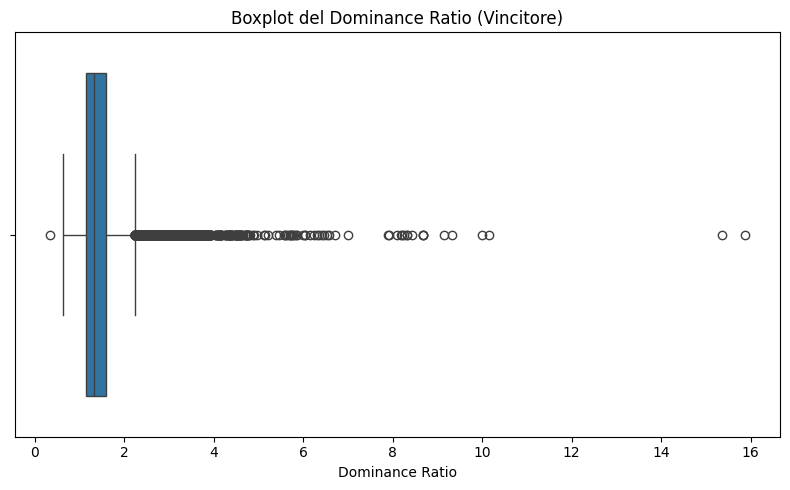

In [65]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['w_dominance_ratio'])
plt.title("Boxplot del Dominance Ratio (Vincitore)")
plt.xlabel("Dominance Ratio")
plt.tight_layout()
plt.show()

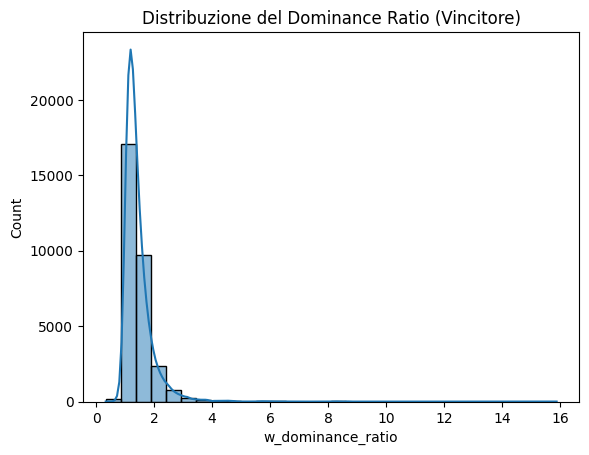

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['w_dominance_ratio'], bins=30, kde=True)
plt.title("Distribuzione del Dominance Ratio (Vincitore)")
plt.show()
